## Exploratory Data Analysis

In [49]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
import re
import nltk

In [50]:
# Load dataset

df = pd.read_csv('../Data/google_API/reviews.csv')
print(df.shape)

(1071, 5)


In [51]:
# Display basic info

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1071 non-null   int64 
 1   product_type  1071 non-null   object
 2   size          1071 non-null   object
 3   text          1071 non-null   object
 4   rating        1071 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 42.0+ KB


,ID,product_type,size,text,rating
0,1,Multi-purpose ladder,12ft,This is great. Daraz kept the connection until...,5
1,2,Multi-purpose ladder,12ft,Good Quality.You don't say anything to say goo...,5
2,3,Multi-purpose ladder,12ft,Good quality and recommended,5
3,4,Multi-purpose ladder,12ft,Good condition and quick service,5
4,5,Multi-purpose ladder,12ft,"Thanks Daraz, product was deliverd on time wit...",5


In [52]:
df['text'].values[10]

'A product at the highest fair value for the price paid. It is a sturdy ladder with a superior finish.'

In [53]:
# checking for null values

df.isnull().sum()

ID              0
product_type    0
size            0
text            0
rating          0
dtype: int64

### no missing values

In [54]:
# checking for duplicates

df.duplicated().sum()

np.int64(0)

### no duplicate values

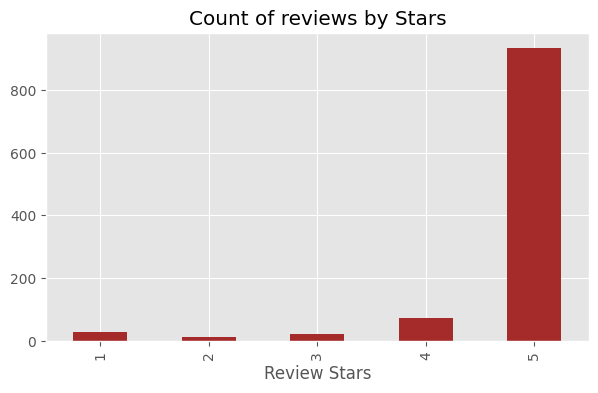

In [55]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar', title='Count of reviews by Stars',figsize=(7,4),color='brown')

ax.set_xlabel('Review Stars')
plt.show()

## Preproccessing

In [56]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords


In [57]:
# load the dataset

data = pd.read_csv('../Data/google_API/reviews.csv')

In [58]:
data["text"].head()

0    This is great. Daraz kept the connection until...
1    Good Quality.You don't say anything to say goo...
2                         Good quality and recommended
3                     Good condition and quick service
4    Thanks Daraz, product was deliverd on time wit...
Name: text, dtype: object

### Step 1: Convert text into lowercase

In [59]:
data["text"] = data["text"].str.lower()

print(data["text"].head())  # Ensure text is in lowercase


0    this is great. daraz kept the connection until...
1    good quality.you don't say anything to say goo...
2                         good quality and recommended
3                     good condition and quick service
4    thanks daraz, product was deliverd on time wit...
Name: text, dtype: object


### Step 2: Remove special characters, numbers, and extra spaces

In [60]:
def clean_special_chars(text):
    text = re.sub(r"[^a-z\s]", "", text)  # Keep only letters and spaces
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

data["text"] = data["text"].apply(clean_special_chars)

print(data["text"].head())  # Text should be clean with only letters and spaces

0    this is great daraz kept the connection until ...
1    good qualityyou dont say anything to say good ...
2                         good quality and recommended
3                     good condition and quick service
4    thanks daraz product was deliverd on time with...
Name: text, dtype: object


### Step 3: Remove stop words

In [61]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    return " ".join(word for word in text.split() if word not in stop_words)

data["text"] = data["text"].apply(remove_stopwords)

print(data["text"].head())  # Stopwords should be removed


0    great daraz kept connection receive ladder lat...
1    good qualityyou dont say anything say good lok...
2                             good quality recommended
3                         good condition quick service
4    thanks daraz product deliverd time safe packin...
Name: text, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nethma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
# Save the new CSV file
data.to_csv("../Data/google_API/pre_reviews.csv", index=False)

print("pre_reviews dataset successfully created!")

pre_reviews dataset successfully created!


### Check missing values again

In [63]:
# load the dataset

df = pd.read_csv('../Data/google_API/pre_reviews.csv')

In [64]:
#check missing values
df.isnull().sum()

ID              0
product_type    0
size            0
text            8
rating          0
dtype: int64

In [65]:
# check duplicate values
df.duplicated().sum()

np.int64(0)

In [66]:
# drop missing values
df.dropna(inplace=True)

# verify that there are no missing values
df.isnull().sum()

ID              0
product_type    0
size            0
text            0
rating          0
dtype: int64

In [67]:
df.to_csv("../Data/preprocessed_data.csv", index=False)

## Labeling Data with VADER

In [68]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [69]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load dataset
df = pd.read_csv("../Data/preprocessed_data.csv")  # Adjust file name if needed

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment label
def get_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        return 1  # Positive
    elif score <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

# Apply VADER to 'text' column (review_text)
df["sentiment"] = df["text"].apply(get_sentiment)

# Save labeled dataset
df.to_csv("../Data/labeled_reviews.csv", index=False)

print("✅ Sentiment labeling completed using VADER!")


✅ Sentiment labeling completed using VADER!


Label Distribution:
 sentiment
 1    924
 0     77
-1     62
Name: count, dtype: int64


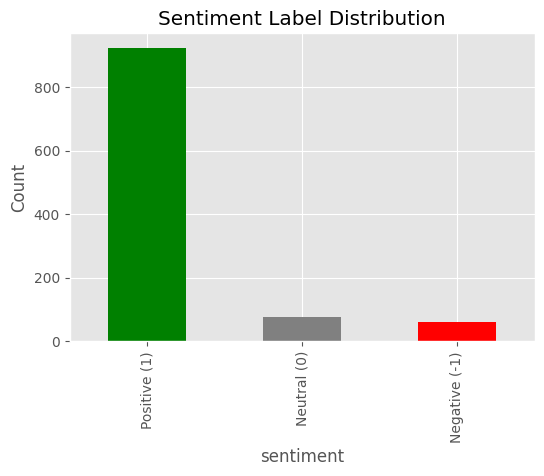

In [70]:
import matplotlib.pyplot as plt

# Count sentiment occurrences
label_counts = df["sentiment"].value_counts()

# Print distribution
print("Label Distribution:\n", label_counts)

# Plot the distribution
plt.figure(figsize=(6, 4))
label_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.xticks(ticks=[0, 1, 2], labels=["Positive (1)", "Neutral (0)", "Negative (-1)"])
plt.ylabel("Count")
plt.title("Sentiment Label Distribution")
plt.show()


##### We can see this dataset is highly imabalance
##### So for handle the imbalance will use SMOTE
#### Before that we have to split the dataset Bc SMOTE should use only for  training data

#### Step 1: Transform text into Numeric Values (TF-IDF)

##### Since machine learning models require numerical input, we will convert the text column into numerical form using TF-IDF (Term Frequency - Inverse Document Frequency).

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load dataset
df = pd.read_csv("../Data/labeled_reviews.csv")  

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to reduce dimensionality

# Apply TF-IDF transformation
X_tfidf = vectorizer.fit_transform(df["text"])  # Transform text column

# Convert to DataFrame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Keep other columns unchanged
df_transformed = pd.concat([df.drop(columns=["text"]), X_tfidf_df], axis=1)

# Save transformed dataset
df_transformed.to_csv("../Data/transformed_data.csv", index=False)

print("✅ TF-IDF transformation completed! /n preprocessed data saved as 'preprocessed_data.csv'.")


✅ TF-IDF transformation completed! /n preprocessed data saved as 'preprocessed_data.csv'.


#### 📌 Step 1: Splitting the Dataset into Train & Test Sets

In [72]:
from sklearn.model_selection import train_test_split

# Load transformed dataset
df = pd.read_csv("../Data/transformed_data.csv")  

# Define features (X) and target variable (y)
X = df.drop(columns=["ID", "product_type", "size", "rating", "sentiment"])  # Features
y = df["sentiment"]  # Target (labels)

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Save split datasets
X_train.to_csv("../Data/X_train.csv", index=False)
X_test.to_csv("../Data/X_test.csv", index=False)
y_train.to_csv("../Data/y_train.csv", index=False)
y_test.to_csv("../Data/y_test.csv", index=False)

print("✅ Data successfully split! Training and testing datasets saved.")


✅ Data successfully split! Training and testing datasets saved.


#### Step 3: Apply SMOTE on Training Data

In [73]:
from imblearn.over_sampling import SMOTE

# Load training dataset
X_train = pd.read_csv("../Data/X_train.csv")
y_train = pd.read_csv("../Data/y_train.csv")

# Apply SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Save SMOTE-applied dataset
X_train_smote.to_csv("../Data/X_train_smote.csv", index=False)
y_train_smote.to_csv("../Data/y_train_smote.csv", index=False)

print("✅ SMOTE applied! Balanced dataset saved as 'X_train_smote.csv' and 'y_train_smote.csv'.")


✅ SMOTE applied! Balanced dataset saved as 'X_train_smote.csv' and 'y_train_smote.csv'.


##### Checked dataset balance

Label Distribution:
 sentiment
-1           739
 0           739
 1           739
Name: count, dtype: int64


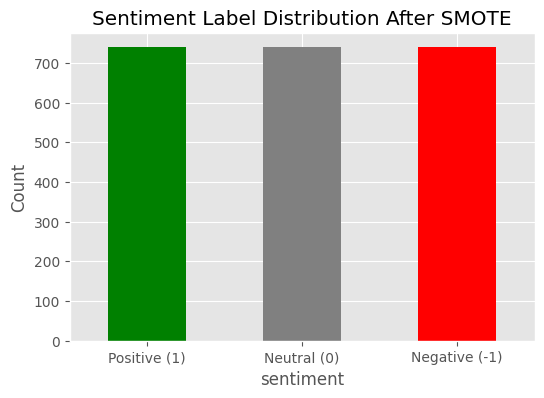

In [74]:

# Count sentiment occurrences
label_counts = y_train_smote.value_counts()

# Print distribution
print("Label Distribution:\n", label_counts)

# Plot the distribution
plt.figure(figsize=(6, 4))
label_counts.plot(kind="bar", color=["green", "gray", "red"])

# Set the x-tick labels for sentiment labels
plt.xticks(ticks=[0, 1, 2], labels=["Positive (1)", "Neutral (0)", "Negative (-1)"], rotation=0)

# Set labels and title
plt.ylabel("Count")
plt.title("Sentiment Label Distribution After SMOTE")

# Show the plot
plt.show()


### For now

In [75]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Train the Logistic Regression model
# model_lr = LogisticRegression(max_iter=1000)
# model_lr.fit(X_train_smote, y_train_smote)

# # Predict on the test set
# y_pred = model_lr.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

# # Classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix for Logistic Regression')
# plt.show()
